Etapa 1: Importaçãodas bibliotecas

In [ ]:
import numpy as np
import math
import re
import pandas as pd
from bs4 import BeautifulSoup
import random
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

In [ ]:
pip install bert-for-tf2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 200 kB/s 
  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.14.9-py3-none-any.whl size=30535 sha256=de4b900522e2ca8c069421d5010aacd401af53e423b91de3cab1d49140ef70af
  Stored in directory: /root/.cache/pip/wheels/47/b6/e5/8c76ec779f54bc5c2f1b57d2200bb9c77616da83873e8acb53
  Created wheel for params-flow: filename=params_flow-0.8.2-py3-none-any.whl size=19472 sha256=bf2f4fa650d40e81ff244cba2b7c144f7071678a1e3acd5fc597eb2b60c66837
  Stored in directory: /root/.cache/pip/wheels/0e/fc/d2/a44fff33af0f233d7def6e7de413006d57c10e10ad736fe8f5
  Created wheel for py-params: filename=py_params-0.10.2-py3-none-any.whl size=7911 sha256=126e3c004be82733e6baede0df3d15a8527f922035ffe717869313847a30808f
  Stored in directory: /root/.cache/pip/wheels/e1/11/67/33cc51bbee127cb8fb2ba549cd29109b2f22da43ddf9969716
Successfully built bert-for-tf2 params-flow p

In [ ]:
pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 6.7 MB/s 


In [ ]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
!pip install tensorflow==2.2.0
import tensorflow as tf
tf.__version__

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 516.2 MB 4.4 kB/s 
     |████████████████████████████████| 2.9 MB 50.4 MB/s 
     |████████████████████████████████| 454 kB 66.9 MB/s 
     |████████████████████████████████| 26.1 MB 75.2 MB/s 
     |████████████████████████████████| 3.0 MB 47.7 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Unin

'2.2.0'

In [ ]:
import tensorflow_hub as hub

In [ ]:
from tensorflow.keras import layers
import bert

Etapa 2: Processamento da base de dados

Carregamento da base de dados

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cols = ['sentiment', 'id', 'date', 'query', 'user', 'text']

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Processamento de Linguagem Natural com BERT e Python/Base de dados sentimentos/Base de dados sentimentos/training.1600000.processed.noemoticon.csv',
                   header = None,
                   names = cols,
                   engine = 'python',
                   encoding = 'latin1')

In [ ]:
data.shape

(1600000, 6)

In [ ]:
data.head()

,sentiment,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
data.drop(['id', 'date', 'query', 'user'],
          axis = 1, inplace=True)

In [ ]:
data.shape

(1600000, 2)

In [ ]:
data.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [ ]:
data.tail()

,sentiment,text
1599995,4,Just woke up. Having no school is the best fee...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...
1599999,4,happy #charitytuesday @theNSPCC @SparksCharity...


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


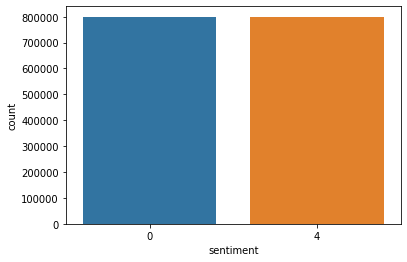

In [ ]:
sns.countplot(data['sentiment']);

Pré-processamento

Limpeza dos textos

In [ ]:
def clean_tweet(tweet):
  tweet = BeautifulSoup(tweet,'lxml').get_text()
  tweet = re.sub(r"@[A-Za-z0-9]+", ' ', tweet)
  tweet = re.sub(r"https?://[A-Za-z0-9./]+", ' ', tweet)
  tweet = re.sub(r"[^A-Za-z.!?']", ' ', tweet)
  tweet = re.sub(r" +", ' ', tweet)
  return tweet

In [ ]:
test = '99 ' + data.text[0]
test

"99 @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [ ]:
result = clean_tweet(test)
result

" Awww that's a bummer. You shoulda got David Carr of Third Day to do it. D"

In [ ]:
data_clean = [clean_tweet(tweet) for tweet in data.text]

In [ ]:
data_clean[0:4]

[" Awww that's a bummer. You shoulda got David Carr of Third Day to do it. D",
 "is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!",
 ' I dived many times for the ball. Managed to save The rest go out of bounds',
 'my whole body feels itchy and like its on fire ']

In [ ]:
data_labels = data.sentiment.values
data_labels

array([0, 0, 0, ..., 4, 4, 4])

In [ ]:
data_labels[data_labels == 4] = 1

In [ ]:
data_labels

array([0, 0, 0, ..., 1, 1, 1])

Tokenização

In [ ]:
FullTokenizer = bert.bert_tokenization.FullTokenizer
bert_layer = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/1', trainable=False)
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = FullTokenizer(vocab_file, do_lower_case)

In [ ]:
def encode_sentence(sent):
  return ["[CLS]"]+tokenizer.tokenize(sent)+["[SEP]"]

In [ ]:
encode_sentence("My dog likes strawberries.")

['[CLS]', 'My', 'dog', 'likes', 'straw', '##berries', '.', '[SEP]']

In [ ]:
encode_sentence("Iron ore headed for its biggest weekly drop since mid-February as China’s spreading virus restrictions and worsening property crisis prevented a recovery in demand.")

['[CLS]',
 'Iron',
 'ore',
 'headed',
 'for',
 'its',
 'biggest',
 'weekly',
 'drop',
 'since',
 'mid',
 '-',
 'February',
 'as',
 'China',
 '’',
 's',
 'spreading',
 'virus',
 'restrictions',
 'and',
 'worse',
 '##ning',
 'property',
 'crisis',
 'prevented',
 'a',
 'recovery',
 'in',
 'demand',
 '.',
 '[SEP]']

In [ ]:
data_inputs= [encode_sentence(sentence) for sentence in data_clean]

In [ ]:
print(data_inputs[0:2])

[['[CLS]', 'A', '##w', '##w', '##w', 'that', "'", 's', 'a', 'b', '##um', '##mer', '.', 'You', 'should', '##a', 'got', 'David', 'Carr', 'of', 'Third', 'Day', 'to', 'do', 'it', '.', 'D', '[SEP]'], ['[CLS]', 'is', 'upset', 'that', 'he', 'can', "'", 't', 'update', 'his', 'Facebook', 'by', 'text', '##ing', 'it', '.', '.', '.', 'and', 'might', 'cry', 'as', 'a', 'result', 'School', 'today', 'also', '.', 'B', '##lah', '!', '[SEP]']]


Criação da base de dados

In [ ]:
def get_ids(tokens):
  return tokenizer.convert_tokens_to_ids(tokens)

In [ ]:
get_ids(tokenizer.tokenize('My dog likes strawberries.'))

[1422, 3676, 7407, 15235, 22630, 119]

In [ ]:
get_ids(tokenizer.tokenize('Iron ore headed for its biggest weekly drop since mid-February as China’s spreading virus restrictions and worsening property crisis prevented a recovery in demand.'))

[5621,
 12327,
 2917,
 1111,
 1157,
 4583,
 5392,
 3968,
 1290,
 2286,
 118,
 1428,
 1112,
 1975,
 787,
 188,
 9243,
 7942,
 9118,
 1105,
 4146,
 3381,
 2400,
 5532,
 8369,
 170,
 7593,
 1107,
 4555,
 119]

In [ ]:
np.char.not_equal("[PAD]", "[PAD]")

array(False)

In [ ]:
def get_mask(tokens):
  return np.char.not_equal(tokens, "[PAD]").astype(int)

In [ ]:
get_mask(tokenizer.tokenize('My dog likes strawberries.'))

array([1, 1, 1, 1, 1, 1])

In [ ]:
def get_segments(tokens):
  seg_ids = []
  current_seg_id = 0
  for tok in tokens:
    seg_ids.append(current_seg_id)
    if tok =="[SEP]":
      current_seg_id = 1 - current_seg_id
  return seg_ids

In [ ]:
print(data_inputs[0])

['[CLS]', 'A', '##w', '##w', '##w', 'that', "'", 's', 'a', 'b', '##um', '##mer', '.', 'You', 'should', '##a', 'got', 'David', 'Carr', 'of', 'Third', 'Day', 'to', 'do', 'it', '.', 'D', '[SEP]']


In [ ]:
get_segments(data_inputs[0])

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
my_sent = ["[CLS]"] + tokenizer.tokenize("Roses are red.") + ["[SEP]"]
my_sent

['[CLS]', 'Roses', 'are', 'red', '.', '[SEP]']

In [ ]:
my_sent = ["[CLS]"] + tokenizer.tokenize("Iron ore headed for its biggest weekly drop since mid-February as China’s spreading virus restrictions and worsening property crisis prevented a recovery in demand.") + ["[SEP]"]
my_sent

['[CLS]',
 'Iron',
 'ore',
 'headed',
 'for',
 'its',
 'biggest',
 'weekly',
 'drop',
 'since',
 'mid',
 '-',
 'February',
 'as',
 'China',
 '’',
 's',
 'spreading',
 'virus',
 'restrictions',
 'and',
 'worse',
 '##ning',
 'property',
 'crisis',
 'prevented',
 'a',
 'recovery',
 'in',
 'demand',
 '.',
 '[SEP]']

In [ ]:
bert_layer([
            tf.expand_dims(tf.cast(get_ids(my_sent), tf.int32), 0),
            tf.expand_dims(tf.cast(get_mask(my_sent), tf.int32), 0),
            tf.expand_dims(tf.cast(get_segments(my_sent), tf.int32), 0)
          ])

[<tf.Tensor: shape=(1, 768), dtype=float32, numpy=
 array([[-3.78472358e-01,  2.31242061e-01,  9.96443868e-01,
         -9.14307952e-01,  8.33292007e-01,  9.39259410e-01,
          8.17017734e-01, -9.98565912e-01, -7.89811790e-01,
         -4.20450002e-01,  8.51845801e-01,  9.73521054e-01,
         -9.99765694e-01, -9.95829880e-01,  8.86705577e-01,
         -7.65584946e-01,  8.97409558e-01, -2.58559495e-01,
         -9.98747230e-01, -9.05077815e-01, -6.95554972e-01,
         -9.95796204e-01,  8.85087773e-02,  9.77816045e-01,
          8.27205539e-01, -7.69829890e-03,  8.93217862e-01,
          9.98240530e-01,  6.57419920e-01, -5.92952609e-01,
          3.99613660e-03, -8.86160851e-01,  9.29603696e-01,
         -9.84985530e-01, -1.67605467e-04,  5.84521472e-01,
          8.60997081e-01, -9.90938768e-03,  8.10446143e-01,
         -9.26201940e-01, -3.69813949e-01, -9.41444635e-01,
          7.66753137e-01, -3.65922391e-01,  9.60843146e-01,
         -1.02240480e-01, -2.27865987e-02, -1.976

In [ ]:
data_with_len = [[sent, data_labels[i], len(sent)]
                 for i, sent in enumerate(data_inputs)]
random.shuffle(data_with_len)
data_with_len.sort(key = lambda x: x[2])
sorted_all = [([get_ids(sent_lab[0]),
               get_mask(sent_lab[0]),
               get_segments(sent_lab[0])],
               sent_lab[1])
              for sent_lab in data_with_len if sent_lab[2] > 7]

In [ ]:
all_dataset = tf.data.Dataset.from_generator(lambda: sorted_all,
                                             output_types = (tf.int32, tf.int32))

In [ ]:
BATCH_SIZE = 32
all_batched = all_dataset.padded_batch(BATCH_SIZE,
                                       padded_shapes=((3, None), ()),
                                       padding_values = (0, 0))

In [ ]:
NB_BATCHES = len(sorted_all) // BATCH_SIZE
NB_BATCHES_TEST = NB_BATCHES //10
all_batched.shuffle(NB_BATCHES)
test_dataset = all_batched.take(NB_BATCHES_TEST)
train_dataset = all_batched.skip(NB_BATCHES_TEST)

Etapa 3: Construção dos textos

In [ ]:
class DCNNBERTEmbedding(tf.keras.Model):
  def __init__(self,
               nb_filters  = 50,
               FFN_units=512,
               nb_classes=2,
               dropout_rate=0.1,
               name="dcnn"):
    super(DCNNBERTEmbedding, self).__init__(name=name)

    self.bert_layer = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/1',
                                     trainable = False)

    self.bigram = layers.Conv1D(filters = nb_filters,
                                kernel_size = 2,
                                padding='valid',
                                activation='relu')
    self.trigram = layers.Conv1D(filters = nb_filters,
                                kernel_size = 3,
                                padding='valid',
                                activation='relu')
    self.fourgram = layers.Conv1D(filters = nb_filters,
                                kernel_size = 4,
                                padding='valid',
                                activation='relu')

    self.pool = layers.GlobalMaxPool1D()

    self.dense_1 = layers.Dense(units = FFN_units, activation='relu')
    self.dropout = layers.Dropout(rate=dropout_rate)
    if nb_classes == 2:
      self.last_dense = layers.Dense(units=1, activation='sigmoid')
    else:
      self.last_dense = layers.Dense(units=nb_classes, activation='softmax')

  def embed_with_bert(self, all_tokens):
    _, embs = self.bert_layer([all_tokens[:, 0, :],
                               all_tokens[:, 1, :],
                               all_tokens[:, 2, :]])
    return embs

  def call(self, inputs,training):
    x = self.embed_with_bert(inputs)

    x_1 = self.bigram(x)
    x_1 = self.pool(x_1)
    x_2 = self.trigram(x)
    x_2 = self.pool(x_2)
    x_3 = self.fourgram(x)
    x_3 = self.pool(x_3)

    merged = tf.concat([x_1, x_2, x_3], axis = -1)
    merged = self.dense_1(merged)
    merged = self.dropout(merged, training)
    output = self.last_dense(merged)

    return output

Etapa 4: Treinamento

In [ ]:
NB_FITERS = 100
FFN_UNITS = 256
NB_CLASSES = 2
DROPOUT_RATE = 0.2
NB_EPOCHS = 5

In [ ]:
Dcnn = DCNNBERTEmbedding(nb_filters = NB_FITERS,
            FFN_units = FFN_UNITS,
            nb_classes = NB_CLASSES,
            dropout_rate = DROPOUT_RATE)

In [ ]:
if NB_CLASSES == 2:
  Dcnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
else:
  Dcnn.compile(loss='sparce_categorical_crossentropy', optimizer='adam', metrics=['sparce_categorical_accuracy'])

In [ ]:
checkpoint_path = '/content/drive/MyDrive/Colab Notebooks/Processamento de Linguagem Natural com BERT e Python/Base de dados sentimentos/Base de dados sentimentos/'

In [ ]:
ckpt = tf.train.Checkpoint(Dcnn=Dcnn)

In [ ]:
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=1)

In [ ]:
if ckpt_manager.latest_checkpoint:
  ckpt.restore(ckpt_manager.latest_checkpoint)
  print('Latest checkpoint restored!')

Latest checkpoint restored!


In [ ]:
class MyCustomCallBack(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    ckpt_manager.save()
    print('Checkpoint saved at {}'.format(checkpoint_path))

In [ ]:
history = Dcnn.fit(train_dataset,
                   epochs=NB_EPOCHS,
                   #steps_per_epoch = 100,
                   callbacks=[MyCustomCallBack()])

Epoch 1/5
  41152/Unknown - 2431s 59ms/step - loss: 0.5921 - accuracy: 0.6846Checkpoint saved at /content/drive/MyDrive/Colab Notebooks/Processamento de Linguagem Natural com BERT e Python/Base de dados sentimentos/Base de dados sentimentos/
41152/41152 [==============================] - 2434s 59ms/step - loss: 0.5921 - accuracy: 0.6846
Epoch 2/5
41152/41152 [==============================] - 2411s 59ms/step - loss: 0.5538 - accuracy: 0.7179
Epoch 3/5
41152/41152 [==============================] - 2403s 58ms/step - loss: 0.5360 - accuracy: 0.7321
Epoch 4/5
41152/41152 [==============================] - 2403s 58ms/step - loss: 0.5261 - accuracy: 0.7392
Epoch 5/5
41152/41152 [==============================] - 2402s 58ms/step - loss: 0.5201 - accuracy: 0.7435


Etapa 5: Avaliação

In [ ]:
results = Dcnn.evaluate(test_dataset)
print(results)

4572/4572 [==============================] - 115s 25ms/step - loss: 0.5999 - accuracy: 0.6666
[0.5999338626861572, 0.6665641665458679]


In [ ]:
def get_prediction(sentence):
  tokens = encode_sentence(sentence)
  inputs_ids = get_ids(tokens)
  input_mask = get_mask(tokens)
  segment_ids = get_segments(tokens)

  inputs = tf.stack(
      [
       tf.cast(inputs_ids, dtype=tf.int32),
       tf.cast(input_mask, dtype=tf.int32),
       tf.cast(segment_ids, dtype=tf.int32),
      ], axis = 0)
  inputs = tf.expand_dims(inputs, 0)

  output = Dcnn(inputs, training=False)

  sentiment = math.floor(output*2)

  if sentiment == 0:
    print('Output of the model: {}\nPredicted sentiment: negative'.format(output))
  elif sentiment == 1:
    print('Output of the model: {}\nPredicted sentiment: positive'.format(output))

In [ ]:
get_prediction('This actor is very bad.')

Output of the model: [[0.03561191]]
Predicted sentiment: negative


In [ ]:
get_prediction("I like dogs")

Output of the model: [[0.34443194]]
Predicted sentiment: negative


In [ ]:
get_prediction("Iron Ore pice raises.")

Output of the model: [[0.67329234]]
Predicted sentiment: positive


In [ ]:
get_prediction("Rio Tinto, the world’s top iron ore producer, reported a drop in shipments in the year’s first quarter amid “challenging” operating conditions.")

Output of the model: [[0.3732223]]
Predicted sentiment: negative


Base Kaggle

In [ ]:
base = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/analise-dados-master/dados/stock_data.csv')

In [ ]:
base.shape

(5791, 2)

In [ ]:
base.head()

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1


In [ ]:
base = base[['Sentiment', 'Text']]

In [ ]:
base.head()

,Sentiment,Text
0,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...
1,1,user: AAP MOVIE. 55% return for the FEA/GEED i...
2,1,user I'd be afraid to short AMZN - they are lo...
3,1,MNTA Over 12.00
4,1,OI Over 21.37


In [ ]:
base.tail()

,Sentiment,Text
5786,-1,Industry body CII said #discoms are likely to ...
5787,-1,"#Gold prices slip below Rs 46,000 as #investor..."
5788,1,Workers at Bajaj Auto have agreed to a 10% wag...
5789,1,"#Sharemarket LIVE: Sensex off day’s high, up 6..."
5790,1,"#Sensex, #Nifty climb off day's highs, still u..."


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


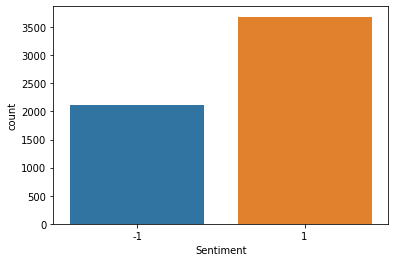

In [ ]:
sns.countplot(base['Sentiment']);

In [ ]:
base_clean = [clean_tweet(tweet) for tweet in base.Text]

In [ ]:
def get_prediction_data(sentence):
  tokens = encode_sentence(sentence)
  inputs_ids = get_ids(tokens)
  input_mask = get_mask(tokens)
  segment_ids = get_segments(tokens)

  inputs = tf.stack(
      [
       tf.cast(inputs_ids, dtype=tf.int32),
       tf.cast(input_mask, dtype=tf.int32),
       tf.cast(segment_ids, dtype=tf.int32),
      ], axis = 0)
  inputs = tf.expand_dims(inputs, 0)

  output = Dcnn(inputs, training=False)

  sentiment = math.floor(output*2)

  return output

In [ ]:
get_prediction_data(base_clean[0])

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.3347488]], dtype=float32)>

In [ ]:
get_prediction_data(base.Text[0])

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.32346094]], dtype=float32)>

In [ ]:
sentiment_predict = [get_prediction_data(sentence) for sentence in base.Text]

In [ ]:
sentiment_predict = np.array(sentiment_predict)

In [ ]:
sentiment_predict[0:4]

array([[[0.32346094]],

       [[0.45540482]],

       [[0.19353195]],

       [[0.64149845]]], dtype=float32)

In [ ]:
senti

In [ ]:
sentiment_predict[sentiment_predict == 0] = -1

In [ ]:
sentiment_predict

array([-1, -1, -1, ..., -1, -1,  1])

In [ ]:
base.Text[0:4]

0    Kickers on my watchlist XIDE TIT SOQ PNK CPW B...
1    user: AAP MOVIE. 55% return for the FEA/GEED i...
2    user I'd be afraid to short AMZN - they are lo...
3                                    MNTA Over 12.00  
Name: Text, dtype: object

In [ ]:
base_predict = pd.DataFrame((zip(sentiment_predict, base.Text)), columns = ['Sentiment', 'Text'])

In [ ]:
base_predict.head()

,Sentiment,Text
0,[[0.32346094]],Kickers on my watchlist XIDE TIT SOQ PNK CPW B...
1,[[0.45540482]],user: AAP MOVIE. 55% return for the FEA/GEED i...
2,[[0.19353195]],user I'd be afraid to short AMZN - they are lo...
3,[[0.64149845]],MNTA Over 12.00
4,[[0.27207944]],OI Over 21.37


In [ ]:
arquivo_tweets_bert = 'tweets_bert.csv'
base_predict.to_csv(arquivo_tweets_bert, encoding='utf-8', index=False,quotechar='|')

In [ ]:
respostas_reais = base['Sentiment'].values
respostas_reais

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
respostas_previstas = base_predict['Sentiment'].values
respostas_previstas, np.unique(respostas_previstas)

(array([array([[0.32346094]], dtype=float32),
        array([[0.45540482]], dtype=float32),
        array([[0.19353195]], dtype=float32), ...,
        array([[0.40915316]], dtype=float32),
        array([[0.39658824]], dtype=float32),
        array([[0.6162876]], dtype=float32)], dtype=object),
 array([array([[9.3958226e-07]], dtype=float32),
        array([[0.01466371]], dtype=float32),
        array([[0.03149628]], dtype=float32), ...,
        array([[0.89158267]], dtype=float32),
        array([[0.9060659]], dtype=float32),
        array([[0.9157777]], dtype=float32)], dtype=object))

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(respostas_reais, respostas_previstas)

0.442756000690727

In [ ]:
cm = confusion_matrix(respostas_reais, respostas_previstas)
cm

array([[1624,  482],
       [2745,  940]])

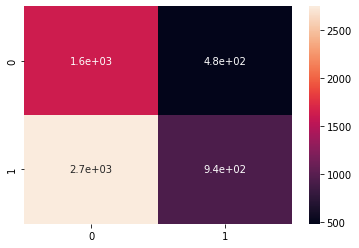

In [ ]:
sns.heatmap(cm, annot=True);

In [ ]:
print(classification_report(respostas_reais, respostas_previstas))

              precision    recall  f1-score   support

          -1       0.37      0.77      0.50      2106
           1       0.66      0.26      0.37      3685

    accuracy                           0.44      5791
   macro avg       0.52      0.51      0.43      5791
weighted avg       0.56      0.44      0.42      5791



Minério Bloomberg

In [ ]:
minerio = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/analise-dados-master/dados/tweets_rot.csv', on_bad_lines='skip')

In [ ]:
minerio.shape

(83, 3)

In [ ]:
minerio.head()

,Data_publicacao,tweet,sentiment
0,2019-07-25 14:09:31,The mining industry is starting to split on wh...,-1
1,2019-07-25 11:39:55,The mining industry is starting to split on wh...,-1
2,2019-07-25 10:35:06,Anglo American plans to buy back up to $1 bill...,1
3,2019-07-20 13:00:06,Vale's second-quarter production due next week...,1
4,2019-07-19 19:59:06,Vale's second-quarter production due next week...,-1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


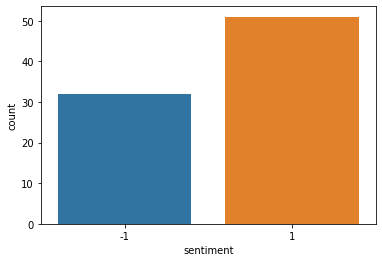

In [ ]:
sns.countplot(minerio['sentiment']);

In [ ]:
minerio_clean = [clean_tweet(tweet) for tweet in minerio.tweet]

In [ ]:
sentiment_predict_minerio = [get_prediction_data(sentence) for sentence in minerio_clean]

In [ ]:
sentiment_predict_minerio = np.array(sentiment_predict_minerio)

In [ ]:
sentiment_predict_minerio[sentiment_predict_minerio == 0] = -1

In [ ]:
sentiment_predict_minerio

array([[[0.30201486]],

       [[0.30201486]],

       [[0.61859   ]],

       [[0.19472954]],

       [[0.19472954]],

       [[0.33379474]],

       [[0.20920986]],

       [[0.35044497]],

       [[0.2469776 ]],

       [[0.24628219]],

       [[0.21229239]],

       [[0.34120232]],

       [[0.38366497]],

       [[0.38366497]],

       [[0.2753007 ]],

       [[0.2753007 ]],

       [[0.28308433]],

       [[0.38082615]],

       [[0.25068343]],

       [[0.3382704 ]],

       [[0.25068343]],

       [[0.22512072]],

       [[0.22512072]],

       [[0.22512072]],

       [[0.36218548]],

       [[0.3653699 ]],

       [[0.36218548]],

       [[0.12467309]],

       [[0.19527137]],

       [[0.5066555 ]],

       [[0.5026652 ]],

       [[0.3040656 ]],

       [[0.2471035 ]],

       [[0.1844151 ]],

       [[0.40183005]],

       [[0.40519246]],

       [[0.539264  ]],

       [[0.15646417]],

       [[0.21933065]],

       [[0.20265026]],

       [[0.19573559]],

       [[0.56348

In [ ]:
 minerio_predict = pd.DataFrame((zip(minerio.Data_publicacao, sentiment_predict_minerio, minerio_clean)), columns = ['Date', 'Sentiment', 'Text'])

In [ ]:
minerio_predict.head()

,Date,Sentiment,Text
0,2019-07-25 14:09:31,[[0.30201486]],The mining industry is starting to split on wh...
1,2019-07-25 11:39:55,[[0.30201486]],The mining industry is starting to split on wh...
2,2019-07-25 10:35:06,[[0.61859]],Anglo American plans to buy back up to billion...
3,2019-07-20 13:00:06,[[0.19472954]],Vale's second quarter production due next week...
4,2019-07-19 19:59:06,[[0.19472954]],Vale's second quarter production due next week...


In [ ]:
arquivo_tweets_bert = 'tweets_bert.csv'
minerio_predict.to_csv(arquivo_tweets_bert, encoding='utf-8', index=False,quotechar='|')

In [ ]:
respostas_reais_minerio = minerio['sentiment'].values
respostas_reais_minerio

array([-1, -1,  1,  1, -1, -1,  1, -1,  1,  1, -1, -1,  1,  1,  1,  1, -1,
       -1, -1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1, -1, -1, -1, -1,  1, -1, -1,  1, -1, -1, -1,
        1,  1,  1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1,  1])

In [ ]:
respostas_previstas_minerio = minerio_predict['Sentiment'].values
respostas_previstas_minerio, np.unique(respostas_previstas_minerio)

(array([-1,  1,  1, -1,  1,  1, -1, -1, -1,  1, -1,  1, -1, -1, -1, -1, -1,
         1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  1, -1, -1, -1, -1,
        -1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1, -1, -1,
        -1,  1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1,  1, -1, -1, -1,  1, -1, -1, -1,  1, -1, -1,  1,  1, -1]),
 array([-1,  1]))

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(respostas_reais_minerio, respostas_previstas_minerio)

0.4819277108433735

In [ ]:
cm = confusion_matrix(respostas_reais_minerio, respostas_previstas_minerio)
cm

array([[24,  8],
       [35, 16]])

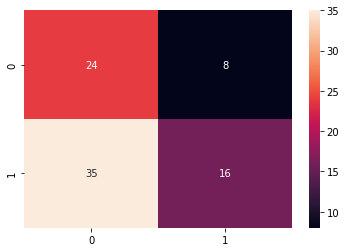

In [ ]:
sns.heatmap(cm, annot=True);

In [ ]:
print(classification_report(respostas_reais_minerio, respostas_previstas_minerio))

              precision    recall  f1-score   support

          -1       0.41      0.75      0.53        32
           1       0.67      0.31      0.43        51

    accuracy                           0.48        83
   macro avg       0.54      0.53      0.48        83
weighted avg       0.57      0.48      0.47        83

